In [32]:
# data
from sklearn.datasets import make_blobs

# preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


# plotting
import matplotlib.pyplot as plt

# mathematical
import numpy as np

# modelling
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import BatchNormalization, Dense
from tensorflow.keras.optimizers import Adam


# global vars
random_state = 1

In [34]:
# plotting functions

def plot_classes(X,y, ax = None):

    """
    Given X and y, where X represents the X values (in 2D) and y the classes,
    plots outcomes with different colors.
    """
    
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    for y_unique in np.unique(y):
        ax.plot(X[y == y_unique, 0], X[y == y_unique, 1], '.')
    return fig, ax

Text(0, 0.5, 'attribute 2')

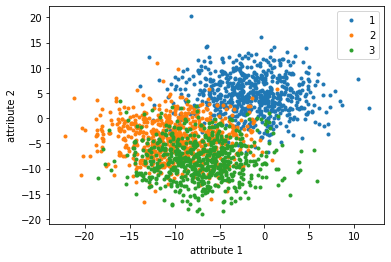

In [127]:
X,y = make_blobs(2000, cluster_std = 4, random_state = random_state)
y_categ = to_categorical(y)
fig, ax = plot_classes(X, y)
plt.legend([1,2,3])
plt.xlabel('attribute 1')
plt.ylabel('attribute 2')

# Train_test_split()

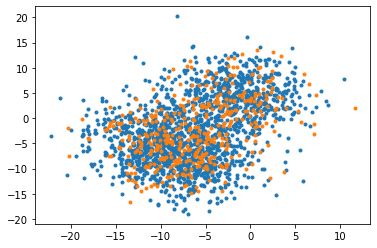

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categ,
                                                    test_size = 0.2,
                                                    random_state = random_state)

plt.plot(X_train[:,0],X_train[:,1],'.')
plt.plot(X_test[:,0],X_test[:,1],'.')

In [148]:
# modelling functions

def uncompiled_model(n_attr = 2, classes = 3):
    
    """
    Creates the architecture for a neural netowrk given the conditions of the data
    going in and coming out
    """
    
    # define input layer
    inputs = Input(shape=(n_attr,), name='InputLayer')
    
    # define hidden layers
    x = Dense(256, activation = 'relu')(inputs)
    x = Dense(128, activation = 'relu')(x)
    x = Dense(64, activation = 'relu')(x)
    x = Dense(8, activation = 'relu')(x)
    x = Dense(4, activation = 'relu')(x)




    # define output layer
    outputs = Dense(classes, activation='softmax')(x)
    
    # create model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

def compile_model(**kwargs):
    """
    Compiles model from 'uncompiled_model'
    """
    
    # create model
    model = uncompiled_model(**kwargs)
    
    # compile model
    model.compile(
        optimizer='adam',
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model



13/13 [==============================] - 0s 1ms/step - loss: 0.9230 - accuracy: 0.7500


[0.9230009317398071, 0.75]

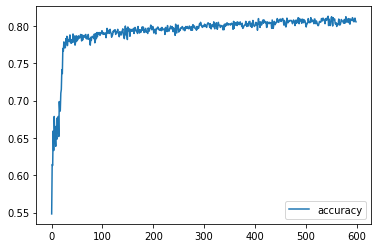

In [149]:
model = compile_model()
history = model.fit(X_train, y_train, verbose = 0, epochs = 600, batch_size = 128)
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.8150


[0.4904731810092926, 0.8149999976158142]

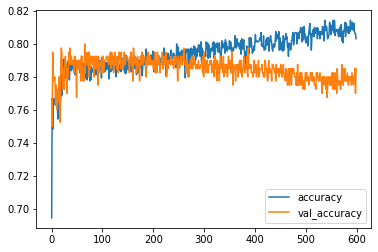

In [150]:
model = compile_model()

history = model.fit(X, y_categ,
                    validation_split = 0.2,
                    verbose = 0,
                    epochs = 600,
                    batch_size = 128)
                    #shuffle = True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

model.evaluate(X_test, y_test)